<a href="https://colab.research.google.com/github/dedecode/Diabetes_Prediction/blob/main/Projeto_IA_Predi%C3%A7%C3%A3o_de_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inteligência Artificial - Projeto da 2ª Unidade

Equipe: André Luiz e Marília Gabriella

Base de Dados escolhida: [Conjunto de Dados para predição de diabetes](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

Tipo de Tarefa: Classificação


## 1. Escolha e Importação da Base de Dados

- Descrição:
A base de dados selecionada tem como objetivo prever o risco de diabetes em pacientes com base em informações médicas e demográficas, como idade, gênero, BMI(Índice de massa corporal), hipertensão, doenças cardíacas, tabagismo, níveis de HbA1c e glicemia.
- Base de dados (Link):
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
- Tarefa e Paradigma:
A tarefa é classificação para determinar se um paciente tem diabetes (positivo ou negativo). O paradigma utilizado é o aprendizado supervisionado, pois os dados possuem rótulos indicando a presença ou ausência da doença.


In [4]:
# Montar o Google Drive para acessar os arquivos
from google.colab import drive
drive.mount('/content/drive')

# Manipulação de Dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento e Normalização
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from scipy import stats

# Divisão de Dados
from sklearn.model_selection import train_test_split

# Otimização de Hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Modelos de Classificação
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Avaliação de Modelos
from sklearn.metrics import accuracy_score, recall_score

# Configurações de visualização do pandas
pd.options.display.float_format = '{:.2f}'.format #Formatação para duas casas decimais
pd.set_option('display.max_rows', None) #Mostrar todas as linhas
pd.set_option('display.max_columns', None) #Mostrar todas as colunas

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_prediction_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Análise Exploratória de Dados (EDA)

Neste ponto, vamos analisar os dados para obter uma visão direcionada de como devemos tratá-los a fim de alcançar nosso objetivo.

In [5]:
#Visualização das 10 primeiras linhas do Dataframe
data.head(n=10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0
5,Female,20.00,0,0,never,27.32,6.60,85,0
6,Female,44.00,0,0,never,19.31,6.50,200,1
7,Female,79.00,0,0,No Info,23.86,5.70,85,0
8,Male,42.00,0,0,never,33.64,4.80,145,0
9,Female,32.00,0,0,never,27.32,5.00,100,0


In [6]:
#Quantidade de linhas e colunas
data.shape

(100000, 9)

In [7]:
#Verificar dados faltantes em cada coluna
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [8]:
#Verificando e exibindo linhas duplicadas
dadosDuplicados = str(data.duplicated().sum())
print('Número de duplicatas: ' + dadosDuplicados+'\n')

Número de duplicatas: 3854



In [9]:
#Informações Gerais do DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
#Resumo estatístico das colunas numéricas do dataframe
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


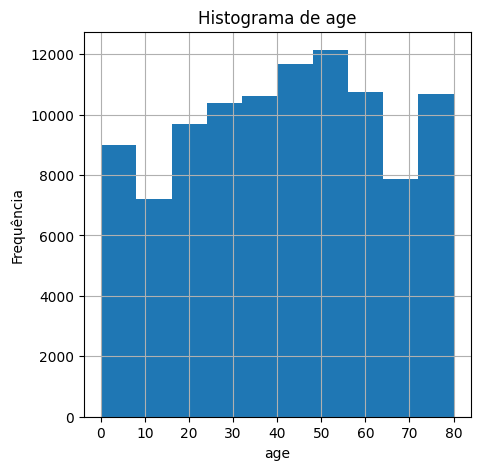

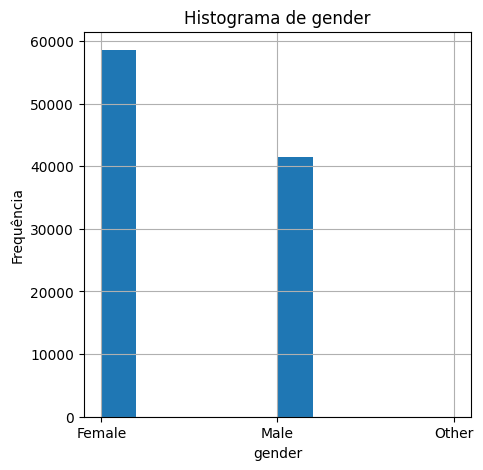

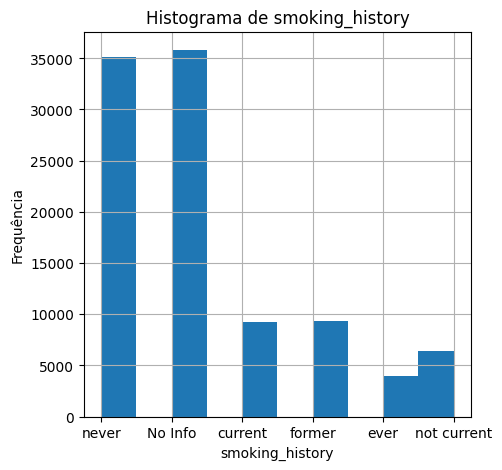

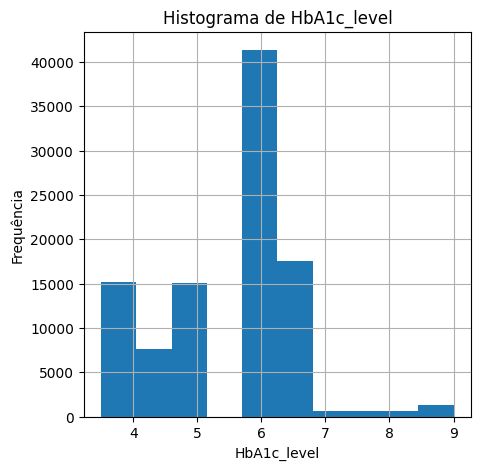

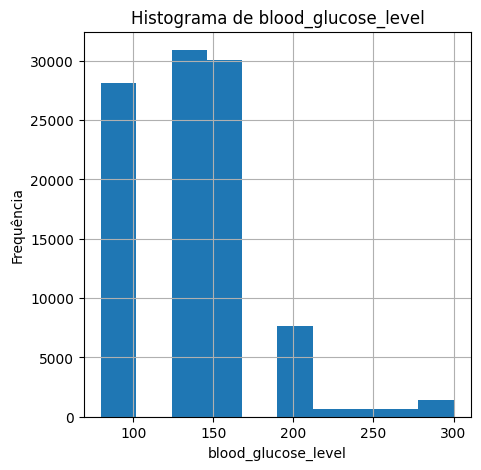

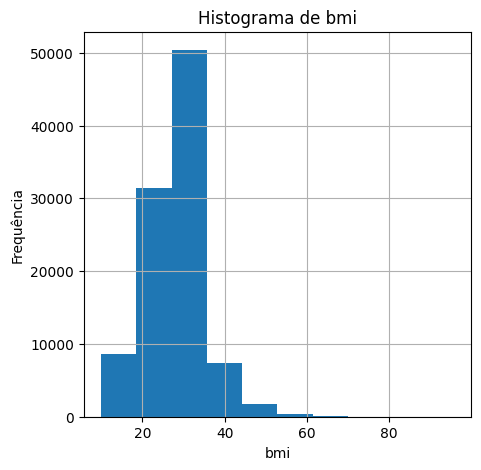

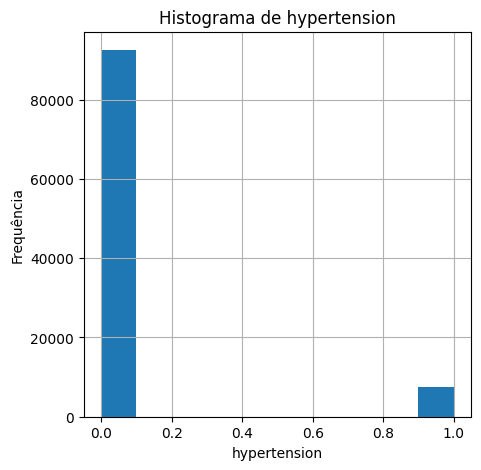

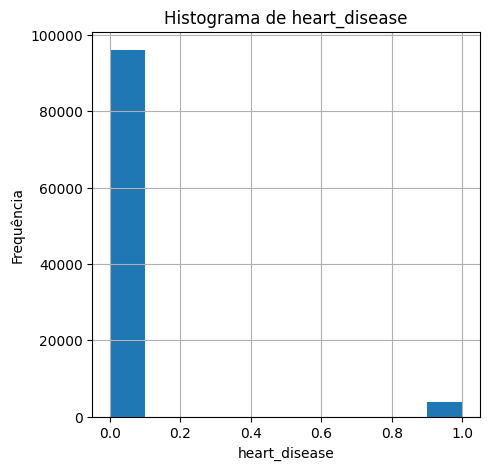

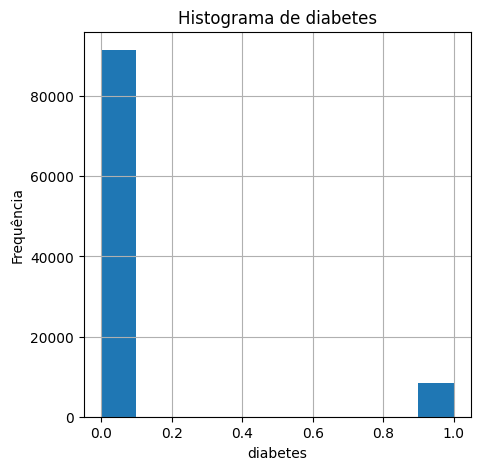

In [11]:
# Variáveis a serem analisadas
variaveis = ['age', 'gender', 'smoking_history', 'HbA1c_level', 'blood_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'diabetes']

# Gerar histogramas para cada variável
for var in variaveis:
    plt.figure(figsize=(5, 5))
    data[var].hist(bins=10)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

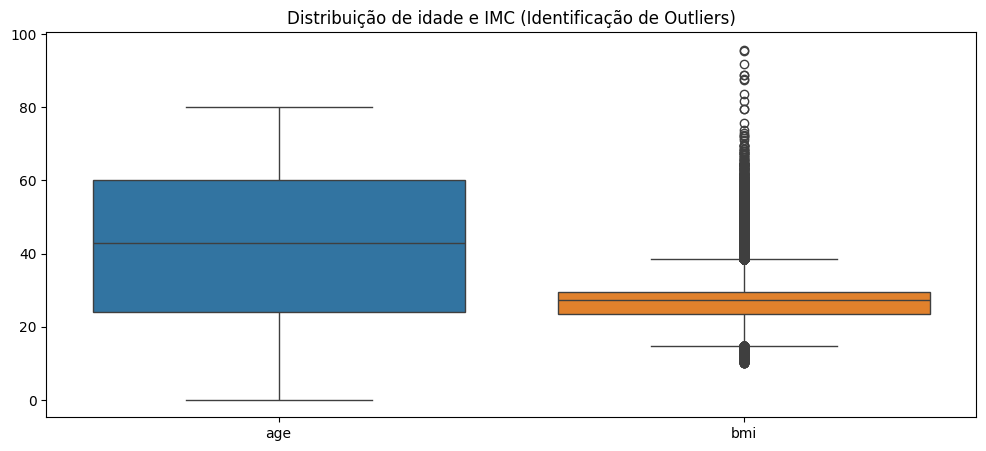

In [12]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=data[['age', 'bmi']])
plt.title("Distribuição de idade e IMC (Identificação de Outliers)")
plt.show()

# Analisando dados referente histórico de fumo.

In [13]:
#Número de pessoas por histórico de tabagismo
contagem_fumante = data['smoking_history'].value_counts()
print(f'Número de pessoas que já fumaram alguma vez: {contagem_fumante.get("ever", 0)}')
print(f'Número de pessoas que nunca fumaram: {contagem_fumante.get("never", 0)}')
print(f'Número de pessoas que fumam atualmente: {contagem_fumante.get("current", 0)}')
print(f'Número de pessoas que atualmente não fumam: {contagem_fumante.get("not current", 0)}')
print(f'Número de ex-fumantes: {contagem_fumante.get("former", 0)}')
print(f'Número de pessoas que não informaram seu histórico: {contagem_fumante.get("No Info", 0)}')

Número de pessoas que já fumaram alguma vez: 4004
Número de pessoas que nunca fumaram: 35095
Número de pessoas que fumam atualmente: 9286
Número de pessoas que atualmente não fumam: 6447
Número de ex-fumantes: 9352
Número de pessoas que não informaram seu histórico: 35816


In [14]:
#Números de diabéticos por categoria de histórico de tabagismo

#Agrupamento de pessoas com diabetes por categoria de fumante
diabetes_por_categoria = data.groupby('smoking_history')['diabetes'].sum()

# Mostrar o número de pessoas com diabetes para cada categoria de fumante
print(f'Número de pessoas com diabetes que já fumaram alguma vez: {diabetes_por_categoria.get("ever", 0)}')
print(f'Número de pessoas com diabetes que nunca fumaram: {diabetes_por_categoria.get("never", 0)}')
print(f'Número de pessoas com diabetes que fumam atualmente: {diabetes_por_categoria.get("current", 0)}')
print(f'Número de pessoas com diabetes que atualmente não fumam: {diabetes_por_categoria.get("not current", 0)}')
print(f'Número de ex-fumantes com diabetes: {diabetes_por_categoria.get("former", 0)}')
print(f'Número de pessoas com diabetes que não informaram seu histórico: {diabetes_por_categoria.get("No Info", 0)}')

Número de pessoas com diabetes que já fumaram alguma vez: 472
Número de pessoas com diabetes que nunca fumaram: 3346
Número de pessoas com diabetes que fumam atualmente: 948
Número de pessoas com diabetes que atualmente não fumam: 690
Número de ex-fumantes com diabetes: 1590
Número de pessoas com diabetes que não informaram seu histórico: 1454


In [15]:
# Número total de pessoas por categoria de histórico de tabagismo
contagem_fumante = data['smoking_history'].value_counts()

# Número de pessoas com diabetes por categoria de fumante
diabetes_por_categoria = data.groupby('smoking_history')['diabetes'].sum()

# Calculando a razão (porcentagem) de diabéticos dentro de cada categoria
porcentagem_diabetes = (diabetes_por_categoria / contagem_fumante) * 100

# Exibir os resultados
print(f'Razão de pessoas com diabetes que já fumaram alguma vez: {porcentagem_diabetes.get("ever", 0):.2f}%')
print(f'Razão de pessoas com diabetes que nunca fumaram: {porcentagem_diabetes.get("never", 0):.2f}%')
print(f'Razão de pessoas com diabetes que fumam atualmente: {porcentagem_diabetes.get("current", 0):.2f}%')
print(f'Razão de pessoas com diabetes que atualmente não fumam: {porcentagem_diabetes.get("not current", 0):.2f}%')
print(f'Razão de ex-fumantes com diabetes: {porcentagem_diabetes.get("former", 0):.2f}%')
print(f'Razão de pessoas com diabetes que não informaram seu histórico: {porcentagem_diabetes.get("No Info", 0):.2f}%')

Razão de pessoas com diabetes que já fumaram alguma vez: 11.79%
Razão de pessoas com diabetes que nunca fumaram: 9.53%
Razão de pessoas com diabetes que fumam atualmente: 10.21%
Razão de pessoas com diabetes que atualmente não fumam: 10.70%
Razão de ex-fumantes com diabetes: 17.00%
Razão de pessoas com diabetes que não informaram seu histórico: 4.06%


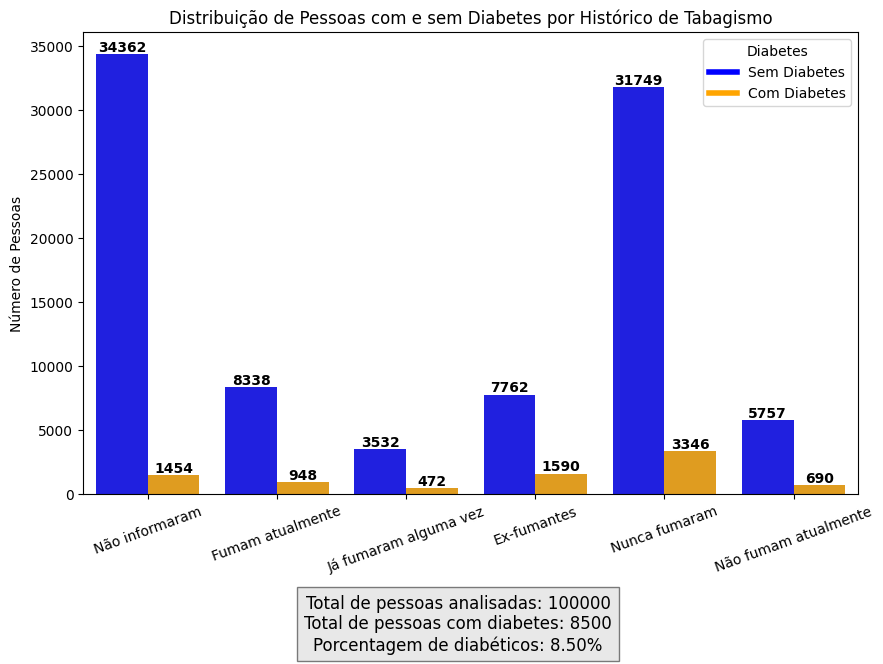

In [16]:
# Contagem total de pessoas no dataset
total_pessoas = len(data)

# Contagem de pessoas com e sem diabetes
num_diabeticos = data['diabetes'].sum()
porcentagem_diabeticos = (num_diabeticos / total_pessoas) * 100

# Contagem de pessoas com e sem diabetes por categoria de tabagismo
contagem_fumante_diabetes = data.groupby(['smoking_history', 'diabetes']).size().reset_index(name='Contagem')

# Mapeando categorias de fumo para português
contagem_fumante_diabetes['smoking_history'] = contagem_fumante_diabetes['smoking_history'].map({
    'ever': 'Já fumaram alguma vez',
    'never': 'Nunca fumaram',
    'current': 'Fumam atualmente',
    'not current': 'Não fumam atualmente',
    'former': 'Ex-fumantes',
    'No Info': 'Não informaram'
})

# Criando o gráfico com cores definidas manualmente
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=contagem_fumante_diabetes, x="smoking_history", y="Contagem", hue="diabetes",
                 palette={0: "blue", 1: "orange"})  # Cores manualmente definidas para "Sem Diabetes" e "Com Diabetes"

# Adicionando os valores sobre as barras
for p in ax.patches:
    value = int(p.get_height())
    if value > 0:  # Só adiciona texto se o valor for maior que 0
        ax.annotate(f'{value}',  # Texto (número de pessoas)
                    (p.get_x() + p.get_width() / 2, p.get_height()),  # Posição do texto
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Personalizando os rótulos
plt.xticks(rotation=20)  # Rotaciona os rótulos do eixo X para melhor leitura
plt.xlabel('') # Melhor visualmente sem rótulo
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Pessoas com e sem Diabetes por Histórico de Tabagismo')

# Ajustando a legenda com as cores correspondentes
plt.legend(title="Diabetes", labels=["Sem Diabetes", "Com Diabetes"],
           handles=[plt.Line2D([0], [0], color='blue', lw=4),
                    plt.Line2D([0], [0], color='orange', lw=4)])

# Adicionando o número total e a porcentagem de diabéticos abaixo do gráfico
plt.figtext(0.5, -0.15, f'Total de pessoas analisadas: {total_pessoas}\n'
                         f'Total de pessoas com diabetes: {num_diabeticos}\n'
                         f'Porcentagem de diabéticos: {porcentagem_diabeticos:.2f}%',
            ha='center', fontsize=12, bbox={"facecolor": "lightgray", "alpha": 0.5, "pad": 5})

# Exibir o gráfico
plt.show()


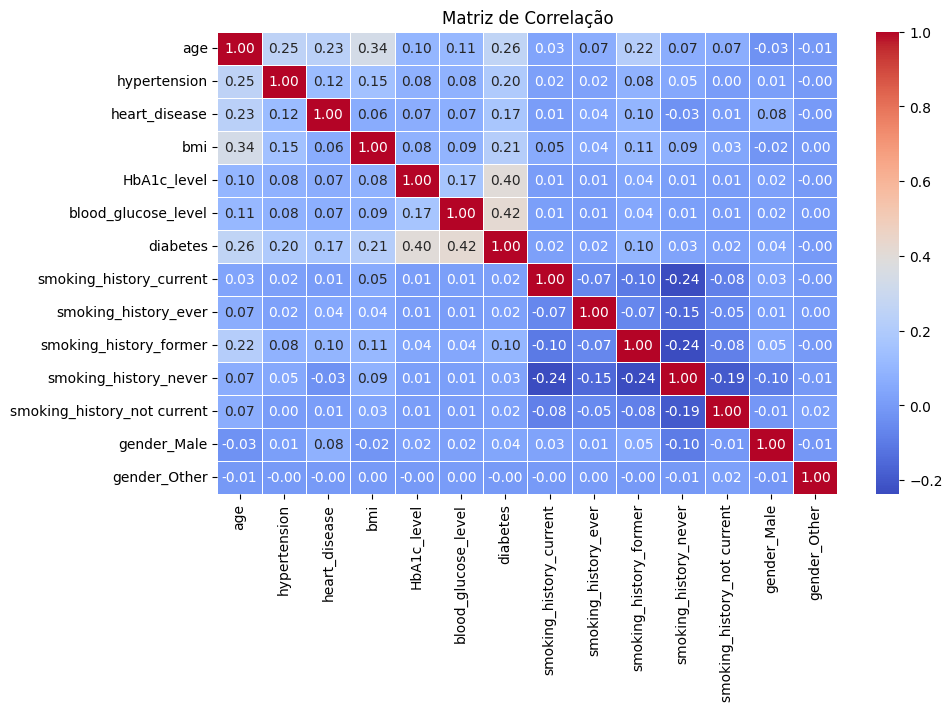

In [17]:
# Criando dummies e removendo a categoria de referência para smoking_history
data_dummies = pd.get_dummies(data, columns=['smoking_history'], drop_first=True)

# Criando dummies para gender apenas se a coluna existir
if 'gender' in data_dummies.columns:
    data_dummies = pd.get_dummies(data_dummies, columns=['gender'], drop_first=True)

# Matriz de correlação
correlation_matrix = data_dummies.corr()

# Plotando o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

#2.1. Achados da Análise Exploratória:

- Recomendo que descrevam nesse ponto que observaram utilizando o código que estará presente na seção acima

Na análise exploratória dos dados, observamos que o dataset contém 100.000 registros e 9 variáveis, sem valores nulos. A variável alvo, diabetes, é desbalanceada, com cerca de 8,5% de indivíduos diabéticos. A distribuição de gênero é de 60% de mulheres. Além disso, identificamos e removeremos as 3.854 linhas duplicadas na preparação dos dados. As variáveis categóricas são não ordenadas e foram transformadas em dummies para análise de correlação.
Durante a análise, o que mais chamou atenção foi uma variável categórica, "smoking_history" (histórico de fumo), que exigiu um tratamento alternativo. A princípio, transformamos as categorias de fumo em variáveis dummies (quebramos as categorias em novas colunas) para entender melhor a relação entre o histórico de tabagismo e a presença de diabetes. Notamos que a categoria "Não informaram" representa mais de 35% do histórico de fumo. A segmentação dos dados revelou padrões interessantes, considerando essa alta proporção de registros não informados.

# 3. Preparação dos Dados

Checklist Pré-Código:



*   Remoção de duplicatas: Eliminar linhas duplicadas identificadas no dataset.

*   Codificação de variáveis categóricas: Converter as variáveis "smoking_history" e "gender" em dummies.

*   Tratamento da categoria "Não informaram": Remover registros dessa categoria em "smoking_history", que representam mais de 35% do dataset.
*   Balanceamento da variável alvo ("diabetes"): Aplicar undersampling para lidar com o desbalanceamento das classes.


*   Identificação e tratamento de outliers: Aplicar técnicas para detectar e remover outliers (IQR).


*   Escalonamento das variáveis numéricas: Aplicar Standard Scaler para normalizar os dados.



In [18]:
# 1. Remoção das linhas duplicadas
data = data.drop_duplicates()
print(f"Linhas após remoção de duplicatas: {data.shape[0]}")

Linhas após remoção de duplicatas: 96146


In [19]:
# 2. Remover registros com "No Info" em smoking_history
data = data[data['smoking_history'] != 'No Info']
print(f"Linhas após remoção de 'No Info' em smoking_history: {data.shape[0]}")

Linhas após remoção de 'No Info' em smoking_history: 63259


In [20]:
# 3. Transformação das variáveis categóricas em dummies
# verifica existencia das colunas
if 'smoking_history' in data.columns and 'gender' in data.columns:
    data = pd.get_dummies(data, columns=['smoking_history', 'gender'], drop_first=True)
else:
    print("Colunas 'smoking_history' e 'gender' foram alteradas no DataFrame.")


# verificando criação dos dummies
print(data.dtypes)

age                            float64
hypertension                     int64
heart_disease                    int64
bmi                            float64
HbA1c_level                    float64
blood_glucose_level              int64
diabetes                         int64
smoking_history_ever              bool
smoking_history_former            bool
smoking_history_never             bool
smoking_history_not current       bool
gender_Male                       bool
gender_Other                      bool
dtype: object


In [21]:
# 4. Balanceamento da variável alvo (Diabetes) usando UnderSampling
X = data.drop(columns=['diabetes'])  # Variáveis independentes
y = data['diabetes']  # Variável alvo

undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)

data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['diabetes'])], axis=1)
print(data['diabetes'].value_counts())


diabetes
0    14074
1     7037
Name: count, dtype: int64


In [22]:
# 5. remoção de outliers por IQR (Z-score removeu muitos dados)
Q1 = data[['age', 'bmi']].quantile(0.25)
Q3 = data[['age', 'bmi']].quantile(0.75)
IQR = Q3 - Q1

# Mantendo apenas valores dentro de 1.5 * IQR
data = data[~((data[['age', 'bmi']] < (Q1 - 1.5 * IQR)) | (data[['age', 'bmi']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Linhas após remoção de outliers pelo IQR: {data.shape[0]}")


Linhas após remoção de outliers pelo IQR: 20106


In [23]:
# 6. Selecionando somente as colunas numéricas (excluindo a variável alvo 'diabetes' e dummies)
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.drop('diabetes')

# Aplicando o StandardScaler somente nas variáveis numéricas
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("Escalonamento das variáveis numéricas concluído!")

Escalonamento das variáveis numéricas concluído!


## 4. Modelagem e Avaliação de Resultados


Decidimos utilizar cinco técnicas:


*   Multilayer Perceptron

*   Support Vector Machine

*   Random Forest
*   K Nearest Neighbor


*   Naive Bayes

Métricas escolhidas:
*   Acurácia: Escolhemos a acurácia para avaliar a proporção geral de previsões corretas dos modelos, garantindo uma visão ampla do desempenho.
*   Recall: Como temos mais dados da classe não diabético do que diabético, a métrica recall é essencial para avaliar o quanto o modelo está capturando corretamente os casos de diabetes, reduzindo o risco de falsos negativos.





In [26]:
# Separando as variáveis independentes (X) e a variável alvo (y)
x_values = data.drop(columns=["diabetes"])  # Exemplo de variável alvo 'diabetes'
y_values = data["diabetes"]

# Dividindo em treino e teste (80% para treino e 20% para teste)
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42, stratify=y_values)

print("Tamanho total da base de dados = ", len(x_values))
print("Tamanho do conjunto de treinamento = ", len(x_train))
print("Tamanho do conjunto de testes = ", len(x_test))

Tamanho total da base de dados =  20106
Tamanho do conjunto de treinamento =  16084
Tamanho do conjunto de testes =  4022


In [27]:
# Modelos a serem treinados
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "MLP (Rede Neural)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# Avaliação dos modelos
for name, model in models.items():
    # Treinando o modelo
    model.fit(x_train, y_train)

    # Fazendo previsões com o conjunto de teste
    y_pred = model.predict(x_test)

    # Calculando a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia do {name}: {accuracy:.4f}")

    # Calculando o recall
    recall = recall_score(y_test, y_pred)
    print(f"Recall do {name}: {recall:.4f}")

    print("="*40)


Acurácia do Random Forest: 0.9033
Recall do Random Forest: 0.8031
Acurácia do MLP (Rede Neural): 0.9085
Recall do MLP (Rede Neural): 0.8125
Acurácia do SVM: 0.8996
Recall do SVM: 0.7774
Acurácia do KNN: 0.8841
Recall do KNN: 0.7961
Acurácia do Naive Bayes: 0.5336
Recall do Naive Bayes: 0.9938


# 4.1. Otimização de Hiperparâmetros

Como o naive bayes foi nosso único modelo com acurácia abaixo do desejado, fizemos a otimização dos hiperparâmetros unicamente desse modelo.
Vale ressaltar que o Naive Bayes só possui dois hiperparâmetros ajustáveis.

In [ ]:
# Definir hiperparâmetros para testar
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7],   # Suavização da variância
    'priors': [None, [0.5, 0.5], [0.6, 0.4]],  # Probabilidades iniciais das classes
}

# Criando o modelo Naive Bayes
nb_model = GaussianNB()

# Grid Search para encontrar melhores parâmetros
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Melhor modelo encontrado
best_nb_model = grid_search.best_estimator_

# Testando no conjunto de testes
y_pred = best_nb_model.predict(x_test)

# Avaliação do modelo ajustado
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Melhor Acurácia do Naive Bayes: {accuracy:.4f}")
print(f"Melhor Recall do Naive Bayes: {recall:.4f}")

Melhor Acurácia do Naive Bayes: 0.7282
Melhor Recall do Naive Bayes: 0.9673


# 5. Discussão dos Resultados

Neste ponto, analisamos os principais aspectos do estudo como um todo e o que podemos extrair desses resultados.

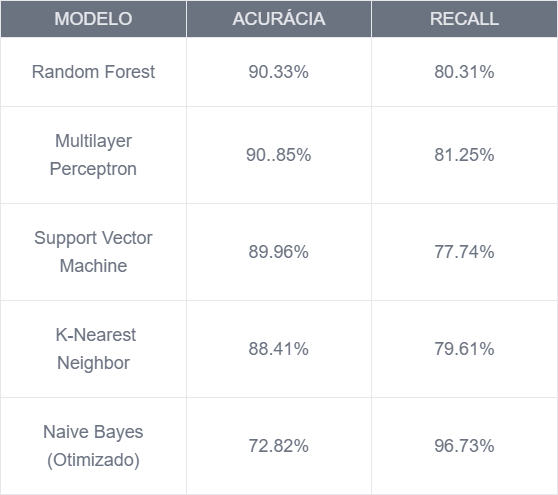

Recomendamos o Multilayer perceptron (MLP), mas é válido desenvolvermos nosso pensamento a seguir:

Para a predição de diabetes, é essencial escolher um modelo que seja preciso e confiável, já que estamos lidando com um problema de saúde. Entre os modelos testados, o MLP apresentou os melhores resultados em acurácia e recall, sendo a opção mais recomendada.

A escolha do MLP se deve ao fato de que, em um contexto médico, é crucial minimizar falsos negativos, ou seja, garantir que o modelo identifique corretamente o maior número possível de pessoas com diabetes.

No entanto, se a interpretação dos resultados for um fator importante, o Random Forest pode ser uma boa alternativa. Ele permite visualizar quais variáveis mais influenciam a previsão, auxiliando profissionais de saúde a entender melhor os fatores de risco.

Portanto, o MLP é a melhor escolha para maximizar a detecção de casos de diabetes, Para aprimorar ainda mais os resultados, o modelo MLP ainda poderia ser trabalhado de maneira mais complexa para ser mais preciso. Enquanto o Random Forest pode ser útil se a transparência do modelo for prioritária.

#6. Usando entradas do usuário


👉🏼
      🚨
     ATENÇÃO
      🚨
     
Este projeto foi desenvolvido exclusivamente para fins de estudo e não deve ser utilizado como ferramenta de diagnóstico médico. Os resultados apresentados são apenas predições baseadas em um modelo estatístico treinado com dados específicos.

Se você tem dúvidas sobre sua saúde, procure um profissional qualificado. Somente um médico pode avaliar corretamente sua condição com base em exames clínicos e laboratoriais.

🔎 Interpretação do Resultado:

Provavelmente Não Diabético 🟩 → O modelo não identificou padrões que indiquem diabetes.

Provavelmente Diabético 🟥 → O modelo encontrou padrões que podem estar associados ao diabetes, mas isso não confirma a doença.
📌 Lembre-se: Somente um profissional de saúde pode fornecer um diagnóstico preciso!

In [48]:
import pickle
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

mlp_model = models["MLP (Rede Neural)"]

with open("mlp_model.pkl", "wb") as file:
    pickle.dump(mlp_model, file)

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

#print("Modelo e scaler salvos com sucesso!")

with open("mlp_model.pkl", "rb") as file:
    modelo = pickle.load(file)

with open("scaler.pkl", "rb") as file:
    scaler = pickle.load(file)

#print("Features esperadas pelo scaler:", scaler.feature_names_in_)
#print("Features esperadas pelo modelo:", modelo.feature_names_in_)

aviso = """
🚨 **Aviso Importante** 🚨

Este projeto foi desenvolvido **exclusivamente para fins de estudo** e não deve ser utilizado como ferramenta de diagnóstico médico.

📌 **Lembre-se:** Somente um profissional de saúde pode fornecer um diagnóstico preciso!
"""

print(aviso)

idade = widgets.IntText(description="Idade:", style={"description_width": "initial"})
imc = widgets.FloatText(description="IMC:", style={"description_width": "initial"})
glicose = widgets.FloatText(description="Glicose:", style={"description_width": "initial"})
hba1c = widgets.FloatText(description="HbA1c:", style={"description_width": "initial"})
hipertensao = widgets.ToggleButtons(
    options=[0, 1],
    description="Hipertensão:",
    style={"description_width": "initial"}
)

doenca_cardiaca = widgets.ToggleButtons(
    options=[0, 1],
    description="Doença Cardíaca:",
    style={"description_width": "initial"}
)

fumante = widgets.Dropdown(
    options={
        "Nunca": "smoking_history_never",
        "Ex-Fumante": "smoking_history_former",
        "Atualmente Fumante": "smoking_history_ever",
        "Não Fumante Atual": "smoking_history_not current"
    },
    description="Histórico de Fumo:",
    style={"description_width": "initial"}
)

genero = widgets.Dropdown(
    options={
        "Masculino": "gender_Male",
        "Outro": "gender_Other"
    },
    description="Gênero:",
    style={"description_width": "initial"}
)

botao = widgets.Button(description="Prever")

def prever(_):
    entrada = pd.DataFrame({
        "age": [idade.value],
        "hypertension": [hipertensao.value],
        "heart_disease": [doenca_cardiaca.value],
        "bmi": [imc.value],
        "HbA1c_level": [hba1c.value],
        "blood_glucose_level": [glicose.value],
        fumante.value: [1],
        genero.value: [1]
    })

    colunas_esperadas = modelo.feature_names_in_
    for col in colunas_esperadas:
        if col not in entrada.columns:
            entrada[col] = 0

    colunas_para_escalar = scaler.feature_names_in_
    entrada[colunas_para_escalar] = scaler.transform(entrada[colunas_para_escalar])

    resultado = modelo.predict(entrada[colunas_esperadas])

    print(f"🔎 Predição: {'🟥 Provavelmente Diabético' if resultado[0] == 1 else '🟩 Provavelmente Não Diabético'}")

botao.on_click(prever)

display(idade, imc, glicose, hba1c, hipertensao, doenca_cardiaca, fumante, genero, botao)



🚨 **Aviso Importante** 🚨

Este projeto foi desenvolvido **exclusivamente para fins de estudo** e não deve ser utilizado como ferramenta de diagnóstico médico. 

📌 **Lembre-se:** Somente um profissional de saúde pode fornecer um diagnóstico preciso!



IntText(value=0, description='Idade:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='IMC:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='Glicose:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='HbA1c:', style=DescriptionStyle(description_width='initial'))

ToggleButtons(description='Hipertensão:', options=(0, 1), style=ToggleButtonsStyle(description_width='initial'…

ToggleButtons(description='Doença Cardíaca:', options=(0, 1), style=ToggleButtonsStyle(description_width='init…

Dropdown(description='Histórico de Fumo:', options={'Nunca': 'smoking_history_never', 'Ex-Fumante': 'smoking_h…

Dropdown(description='Gênero:', options={'Masculino': 'gender_Male', 'Outro': 'gender_Other'}, style=Descripti…

Button(description='Prever', style=ButtonStyle())

🔎 Predição: 🟩 Provavelmente Não Diabético
